# Digital Epidemiology Final Project

**LEONARDO LAVAGNA 1650170**

**GROUP 14**

## PART 1 . Simulation of an epidemic on a given network using an SIR model

### Set up

In [1]:
#!pip install EoN

In [2]:
# LIBRARIES

import networkx as nx
import matplotlib.pyplot as plt
import EoN
import random
from collections import defaultdict

In [3]:
# GLOBAL PARAMETERS

#transmission rates
beta  = 0.005
betas = [beta,beta/10]

#recovery rate
gamma = 0.025

#times
t0   = 0
tmax = 100

#r0
r0 = beta/gamma
print("Value of r_0:", r0)

#percentage of initial infected
rho = 0.1

#parameters
betas = [0.005,0.0005]

Value of r_0: 0.19999999999999998


### Graph creation

In [4]:
# GRAPH

g = nx.read_edgelist("edges-13.csv",delimiter=',',create_using=nx.Graph(),nodetype=int)

In [5]:
# CHECK

print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 5345
Number of edges: 25639
Average degree:   9.5936


In [6]:
# POPULATION SIZE

N = g.number_of_nodes()

In [7]:
# NODES POSITIONS FOR PLOTTING

spring_pos = nx.spring_layout(g)

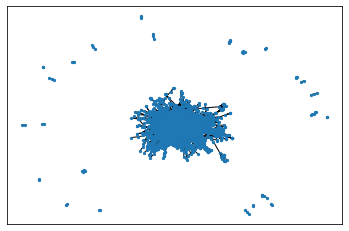

In [8]:
# PLOT

nx.draw_networkx(g,pos=spring_pos,with_labels=False,node_size=5)

### SIR simulation

In [9]:
# SIMULATION

sim = EoN.Gillespie_SIR(g,tau = beta, gamma = gamma,return_full_data=True)
t, S, I, R = EoN.Gillespie_SIR(g,tau = beta, gamma = gamma,rho = rho)

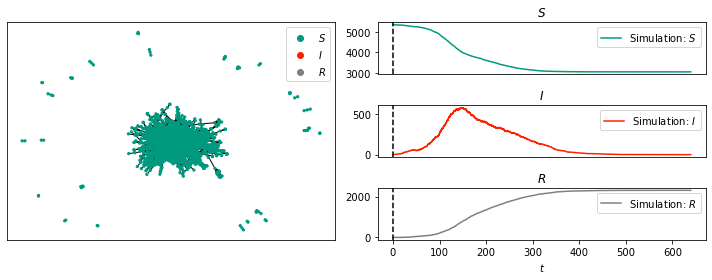

In [10]:
# PLOT AT TIME t0

sim.display(time=t0,pos=spring_pos,node_size=5)
plt.show()

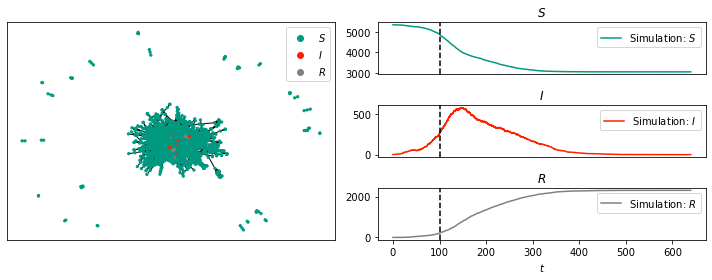

In [11]:
# PLOT AT TIME tmax

sim.display(time=tmax,pos=spring_pos,node_size=5)
plt.show()

### SIR dynamics

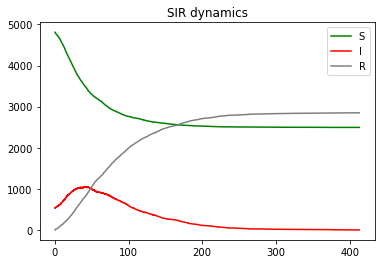

In [12]:
# PLOT
fig, ax = plt.subplots()
ax.plot(t, S, label = "S",color="green")
ax.plot(t, I, label = "I",color="red")
ax.plot(t, R, label = "R",color="grey")
plt.title("SIR dynamics")
plt.legend(loc="best")
plt.show()

In [13]:
# EPIDEMIC SIZE

I.argmax()/N

0.43985032740879326

### Analysis of the final epidemic size as beta changes when gamma is fixed 


In [14]:
# SIMULATION IN THE CASE r0>1

t1, S1, I1, R1 = EoN.Gillespie_SIR(g,tau = betas[0], gamma = gamma,rho = rho)

In [15]:
# SIMULATION IN THE CASE r0<1

t2, S2, I2, R2 = EoN.Gillespie_SIR(g,tau = betas[1], gamma = gamma,rho = rho)

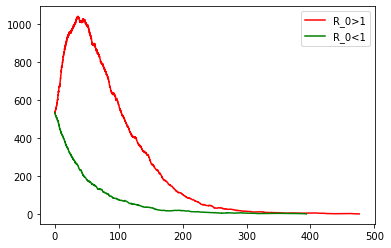

In [16]:
# PLOT

plt.plot(t1, I1, color='r', label='R_0>1')
plt.plot(t2, I2, color='g', label='R_0<1')
plt.legend()
plt.show()

### Study of the epidemic threshold

**Reference**: Gabriel Fabricius, Alberto Maltz, Exploring the threshold of epidemic spreading for a stochastic SIR model with local and global contacts, Physica A: Statistical Mechanics and its Applications, Volume 540, 2020, 123208, ISSN 0378-4371, https://doi.org/10.1016/j.physa.2019.123208. 

**Online Version of the Reference**: https://www.sciencedirect.com/science/article/pii/S0378437119318035)

In [17]:
# SIMULATION

sim_thr = EoN.Gillespie_SIR(g, tau=gamma, gamma=gamma, return_full_data=True)
t_thr, S_thr, I_thr, R_thr = EoN.Gillespie_SIR(g, tau=gamma, gamma=gamma, rho=rho)

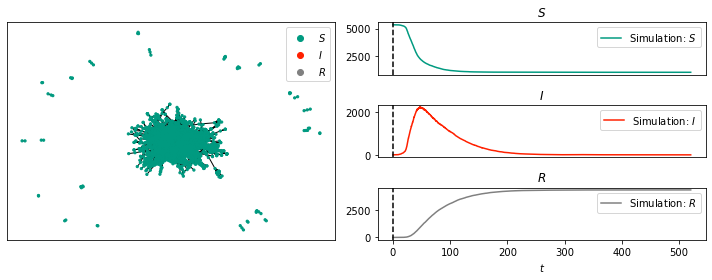

In [18]:
# PLOT AT TIME t0

sim_thr.display(time=t0, pos=spring_pos,node_size=5)
plt.show()

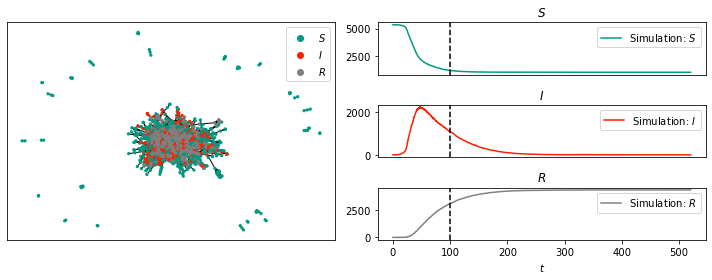

In [19]:
# PLOT AT TIME tmax

sim_thr.display(time=tmax, pos=spring_pos,node_size=5)
plt.show()

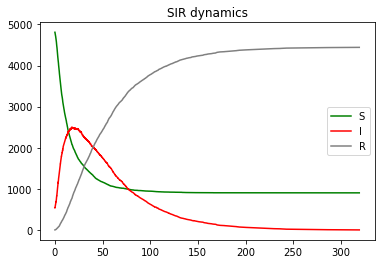

In [20]:
# PLOT DYNAMICS

fig, ax = plt.subplots()
ax.plot(t_thr, S_thr, label = "S",color="green")
ax.plot(t_thr, I_thr, label = "I",color="red")
ax.plot(t_thr, R_thr, label = "R",color="grey")
plt.title("SIR dynamics")
plt.legend(loc="best")
plt.show()

## SUPPLEMENT TO PART 1 . Equivalence of EoN.Gillespie_SIR and EoN.fast_SIR
**Reference**: https://arxiv.org/pdf/2001.02436.pdf

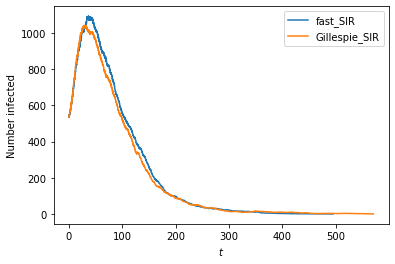

In [21]:
# EQUIVALENCE EoN.Gillespie_SIR AND EoN.fast_SIR

t_f, S_f, I_f, R_f = EoN.fast_SIR(g, tau=beta, gamma=gamma, rho=rho)
t_g, S_g, I_g, R_g = EoN.Gillespie_SIR(g, tau=beta, gamma=gamma, rho=rho)

plt.plot(t_f, I_f, label = 'fast_SIR')
plt.plot(t_g, I_g, label = 'Gillespie_SIR')
plt.xlabel('$t$')
plt.ylabel('Number infected')
plt.legend()
plt.show()

## PART 2 . Generate a random network by randomly rewiring a variable percentage of edges and repeat Part 1

### Graph creation

In [22]:
# PARAMETERS

#percentage of edges to rewire
p = 0.3

In [23]:
# EXAMPLE GRAPHS WITH 30% OF EDGES REMOVED

#Copy of g
g_s = nx.read_edgelist("edges-13.csv",delimiter=',',create_using=nx.Graph(),nodetype=int)

#population size
N_s = g_s.number_of_nodes()

#Sample a percentage p of random edges and nodes
sampled_edges = random.sample(g_s.edges,int(p*N_s))
sampled_nodes = random.sample(g_s.nodes,int(p*N_s))

#rewire a percentage p of random edges
for e in sampled_edges:
    #remove random edge
    g_s.remove_edge(*e)
    #add back the edge
    uv = random.sample(g_s.nodes,2)
    g_s.add_edge(*uv)

#check
print(nx.info(g_s))

Name: 
Type: Graph
Number of nodes: 5345
Number of edges: 25636
Average degree:   9.5925


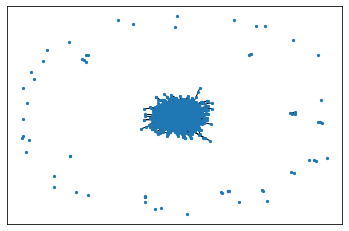

In [24]:
# PLOT

spring_pos_gs = nx.spring_layout(g_s)
nx.draw_networkx(g_s,pos=spring_pos_gs,with_labels=False,node_size=5)

### Repeat Part 1 with the new graph

In [25]:
# SIR SIMULATION

t_s, S_s, I_s, R_s = EoN.Gillespie_SIR(g_s, tau=beta, gamma=gamma, rho=rho)

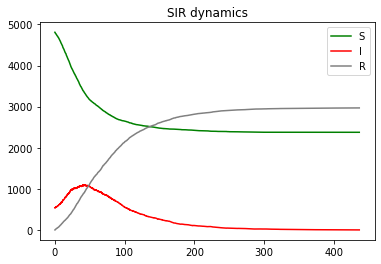

In [26]:
# SIR DYNAMICS

fig, ax = plt.subplots()
ax.plot(t_s, S_s, label = "S",color="green")
ax.plot(t_s, I_s, label = "I",color="red")
ax.plot(t_s, R_s, label = "R",color="grey")
plt.title("SIR dynamics")
plt.legend(loc="best")
plt.show()

In [27]:
# EPIDEMIC SIZE

I_s.argmax()/N_s

0.4471468662301216

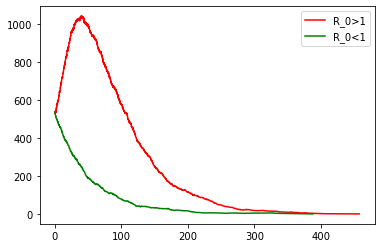

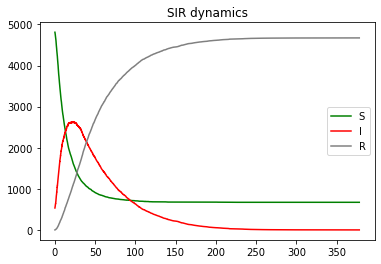

In [28]:
# ANALYSIS OF THE FINAL EPIDEMIC SIZE AS BETA CHANGES WHEN GAMMA IS FIXED 

#Simulation when r0>1
t3, S3, I3, R3 = EoN.Gillespie_SIR(g_s,tau = betas[0], gamma = gamma,rho = rho)
#Simulation when r0>1
t4, S4, I4, R4 = EoN.Gillespie_SIR(g_s,tau = betas[1], gamma = gamma,rho = rho)
#plot of the SIR dynamics
plt.plot(t3, I3, color='r', label='R_0>1')
plt.plot(t4, I4, color='g', label='R_0<1')
plt.legend()
plt.show()
#Simulation in the case of epidemic threshold
t5, S5, I5, R5 = EoN.Gillespie_SIR(g_s,tau=gamma, gamma = gamma,rho = rho)
fig, ax = plt.subplots()
ax.plot(t5, S5, label = "S",color="green")
ax.plot(t5, I5, label = "I",color="red")
ax.plot(t5, R5, label = "R",color="grey")
plt.title("SIR dynamics")
plt.legend(loc="best")
plt.show()

## PART 3 . Repeat Part 1 with part of the population immunized

### Random Imunization

In [45]:
#copy of g
G = g

#initialization of the infection
initial_infections = random.sample(G.nodes,10)

#check
print(initial_infections)

[883, 1015, 2991, 3211, 877, 824, 2522, 151, 830, 1230]


In [46]:
#spontaneous transitions
H = nx.DiGraph() 
H.add_edge('Sus', 'Vac', rate = 0.01)
H.add_edge('Inf', 'Rec', rate = 1.0)

#induced transitions
J = nx.DiGraph() 
J.add_edge(('Inf', 'Sus'), ('Inf', 'Inf'), rate = 2.0)

In [47]:
#default dictionary with default value 'Sus'
IC = defaultdict(lambda:'Sus') 

In [48]:
#Infect initial nodes
for node in initial_infections:
    IC[node] = 'Inf'

In [49]:
#Status
return_statuses = ['Sus', 'Inf', 'Rec', 'Vac']

In [50]:
#Parameters for plotting
color_dict = {'Sus': '#009a80','Inf':'#ff2000', 'Rec':'gray','Vac': '#5AB3E6'}
pos_G = {node:node for node in G}
tex = False
sim_G_kwargs = {'color_dict':color_dict, 'pos':pos_G, 'tex':tex}

In [51]:
#Positions for plotting
spring_pos_G = nx.spring_layout(G)

In [52]:
#Simulation of the epidemy in a weak
sim_G = EoN.Gillespie_simple_contagion(G, H, J, IC, return_statuses, tmax=7, 
                                       return_full_data=True, sim_kwargs=sim_G_kwargs)

KeyError: (1224, 1224)

In [ ]:
#times is a numpy array of times. D is a dict, whose keys are the entries in return_statuses.
#the values are numpy arrays giving the number in that status at the corresponding time.
times, D = sim_G.summary()

In [ ]:
#a new dict giving number not yet infected or the number ever infected
newD = {'Sus+Vac':D['Sus']+D['Vac'], 'Inf+Rec' : D['Inf'] + D['Rec']}

In [ ]:
# add the timeseries to the simulation.
#
new_timeseries = (times, newD)
sim_G.add_timeseries(new_timeseries, label = 'Simulation',
                     color_dict={'Sus+Vac':'#E69A00', 'Inf+Rec':'#CD9AB3'})

In [ ]:
#Plot
sim_G.display(time=7, node_size = 5, ts_plots=[['Inf'], ['Sus+Vac', 'Inf+Rec']])
plt.show()

### Imunization following the closeness centrality measure